In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as m
import subprocess as sp

def run_cmd(nproc, size, iterations):
    cmd = ['wsl', 'mpirun', '-np', str(nproc), './life',
           str(size),
           str(iterations)
           ]
    output = sp.check_output(cmd, shell=True).decode('cp866')

    return float(output)

def plot_time_size(initial_size, end_size, factor, iterations):
    def calc_time(nproc):
        x, y = np.array([]), np.array([])
        size = initial_size
        while size < end_size:
            x = np.append(x, size)
            time = run_cmd(nproc, size, iterations)
            y = np.append(y, time)
            size *= factor
        return x, y

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='size, n', ylabel='time, s')

    x, ys = calc_time(1)
    ax.plot(x, ys, label='serial')
    ax.legend()

    x, yp2 = calc_time(2)
    ax.plot(x, yp2, label='parallel 2')
    ax.legend()

    x, yp4 = calc_time(4)
    ax.plot(x, yp4, label='parallel 4')
    ax.legend()

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='points number, n', ylabel='time, s / (n * n)')

    ys = ys / np.array([n * n for n in x])
    ax.plot(x, ys, label='serial')
    ax.legend()

    yp2 = yp2 / np.array([n * n for n in x])
    ax.plot(x, yp2, label='parallel 2')
    ax.legend()

    yp4 = yp4 / np.array([n * n for n in x])
    ax.plot(x, yp4, label='parallel 4')
    ax.legend()

def plot_time_proc(nproc_max, size, iterations):
    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='processes number', ylabel='time, s', title='Execution time')

    x = range(1, nproc_max + 1)
    y = np.array([])
    for nproc in x:
        time = run_cmd(nproc, size, iterations)
        y = np.append(y, time)

    ax.plot(x, y)

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='processes number', ylabel='acceleration', title='Acceleration')
    y = y[0] / y
    ax.plot(x, y)

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='processes number', ylabel='efficiency', title='Efficiency')
    y = y / x
    ax.plot(x, y)

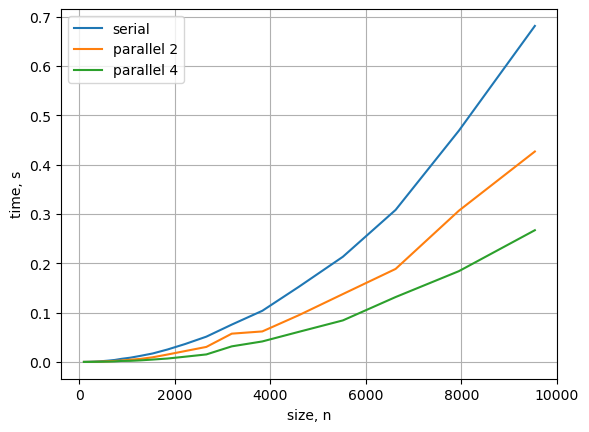

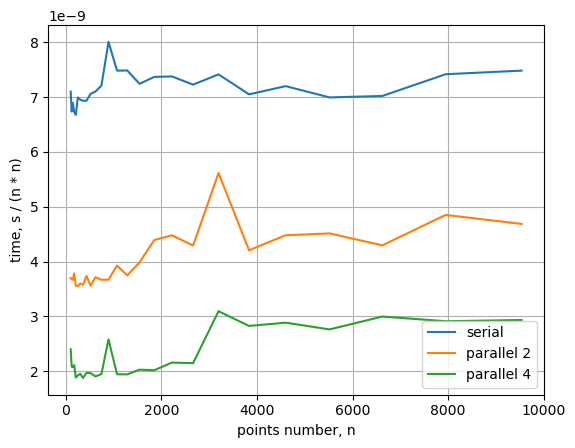

In [2]:
plot_time_size(100, 10000, 1.2, 10)

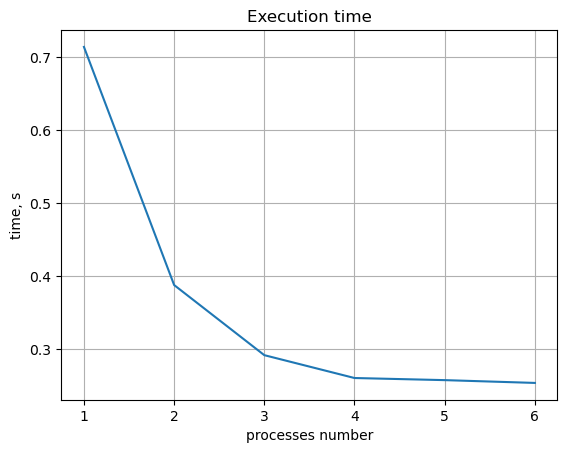

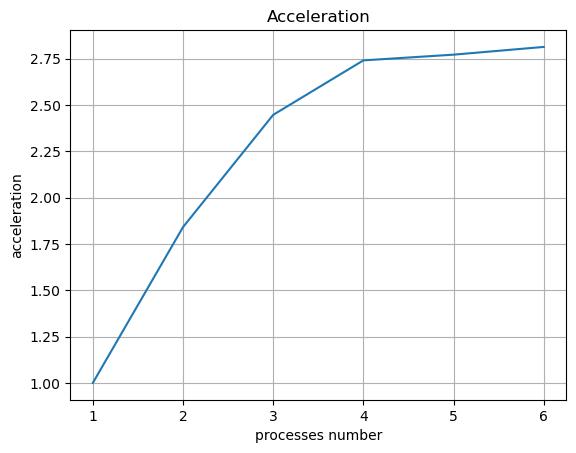

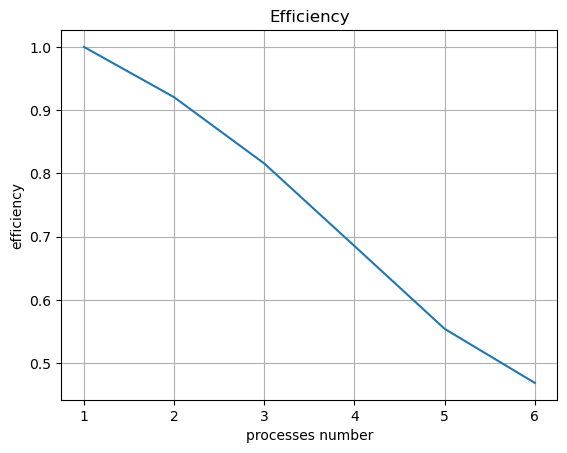

In [4]:
plot_time_proc(6, 10000, 10)